In [1]:
import sys
src_path = "..\\src"
src_path_2 = "..\\venv"

sys.path.append('C:/Users/janse/OneDrive/Dokumenter/4. Semester/Anvendt programmering/Milj-dataanalyse/venv7Lib/site-packages')
sys.path.append('C:/Users/janse/AppData/Local/Programs/Python/Python312/Lib/site-packages')

if src_path not in sys.path:
        sys.path.insert(0, src_path)

if src_path_2 not in sys.path:
        sys.path.insert(0, src_path_2)


# Alle funskjonene ligger i en felles fil
import functions as fc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from pandasql import sqldf
from matplotlib.widgets import CheckButtons

import functions as fc

# Forberedelser
### Last ned datasettet

In [2]:
# Hente frem datasettet og kaller det wind
wind = pd.read_csv('../data/wind.csv')

# Dobbelskjekket at dataen har kommet, ved å vise de første 5 linjene
wind.head()

,Unnamed: 0,verdi,tidsforskyvning,referansetid
0,0,6.9,PT0H,2024-01-01T00:00:00.000Z
1,1,6.3,PT0H,2024-01-02T00:00:00.000Z
2,2,5.4,PT0H,2024-01-03T00:00:00.000Z
3,3,4.8,PT0H,2024-01-04T00:00:00.000Z
4,4,1.9,PT0H,2024-01-05T00:00:00.000Z


# Forstå data
Se hvilke datatyper vi har og blir mere kjent med datasettet, for å gjøre det lettere å jobbe med senere.

In [3]:
# Skjekker hvilke datatype refaransetid er
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       730 non-null    int64  
 1   verdi            730 non-null    float64
 2   tidsforskyvning  730 non-null    object 
 3   referansetid     730 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.9+ KB


I dette datasettet har vi integer, float og object som er string.

In [4]:
# forstå dataen
print('type:', type(wind))
print('shape:', wind.shape)

type: <class 'pandas.core.frame.DataFrame'>
shape: (730, 4)


### Verdier

In [5]:
# den minste og største verdien
print("Den minste verdien er", wind['verdi'].min())
print("Den største verdien er", wind['verdi'].max())

Den minste verdien er 0.6
Den største verdien er 11.4


In [6]:
# 10 tilfelige verdier
wind.sample(10)

,Unnamed: 0,verdi,tidsforskyvning,referansetid
9,9,0.8,PT0H,2024-01-10T00:00:00.000Z
457,457,3.3,PT0H,2024-04-02T00:00:00.000Z
91,91,3.5,PT0H,2024-04-01T00:00:00.000Z
148,148,2.2,PT0H,2024-05-28T00:00:00.000Z
711,711,2.3,PT0H,2024-12-12T00:00:00.000Z
417,417,3.7,PT0H,2024-02-22T00:00:00.000Z
476,476,5.4,PT0H,2024-04-21T00:00:00.000Z
246,246,2.0,PT0H,2024-09-03T00:00:00.000Z
205,205,3.1,PT0H,2024-07-24T00:00:00.000Z
720,720,1.8,PT0H,2024-12-21T00:00:00.000Z


In [7]:
# de siste verdiene
wind.tail()

,Unnamed: 0,verdi,tidsforskyvning,referansetid
725,725,6.6,PT0H,2024-12-26T00:00:00.000Z
726,726,4.3,PT0H,2024-12-27T00:00:00.000Z
727,727,6.2,PT0H,2024-12-28T00:00:00.000Z
728,728,6.2,PT0H,2024-12-29T00:00:00.000Z
729,729,6.1,PT0H,2024-12-30T00:00:00.000Z


# Manglende verdier

Unnamed: 0         0
verdi              0
tidsforskyvning    0
referansetid       0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, verdi, tidsforskyvning, referansetid]
Index: []


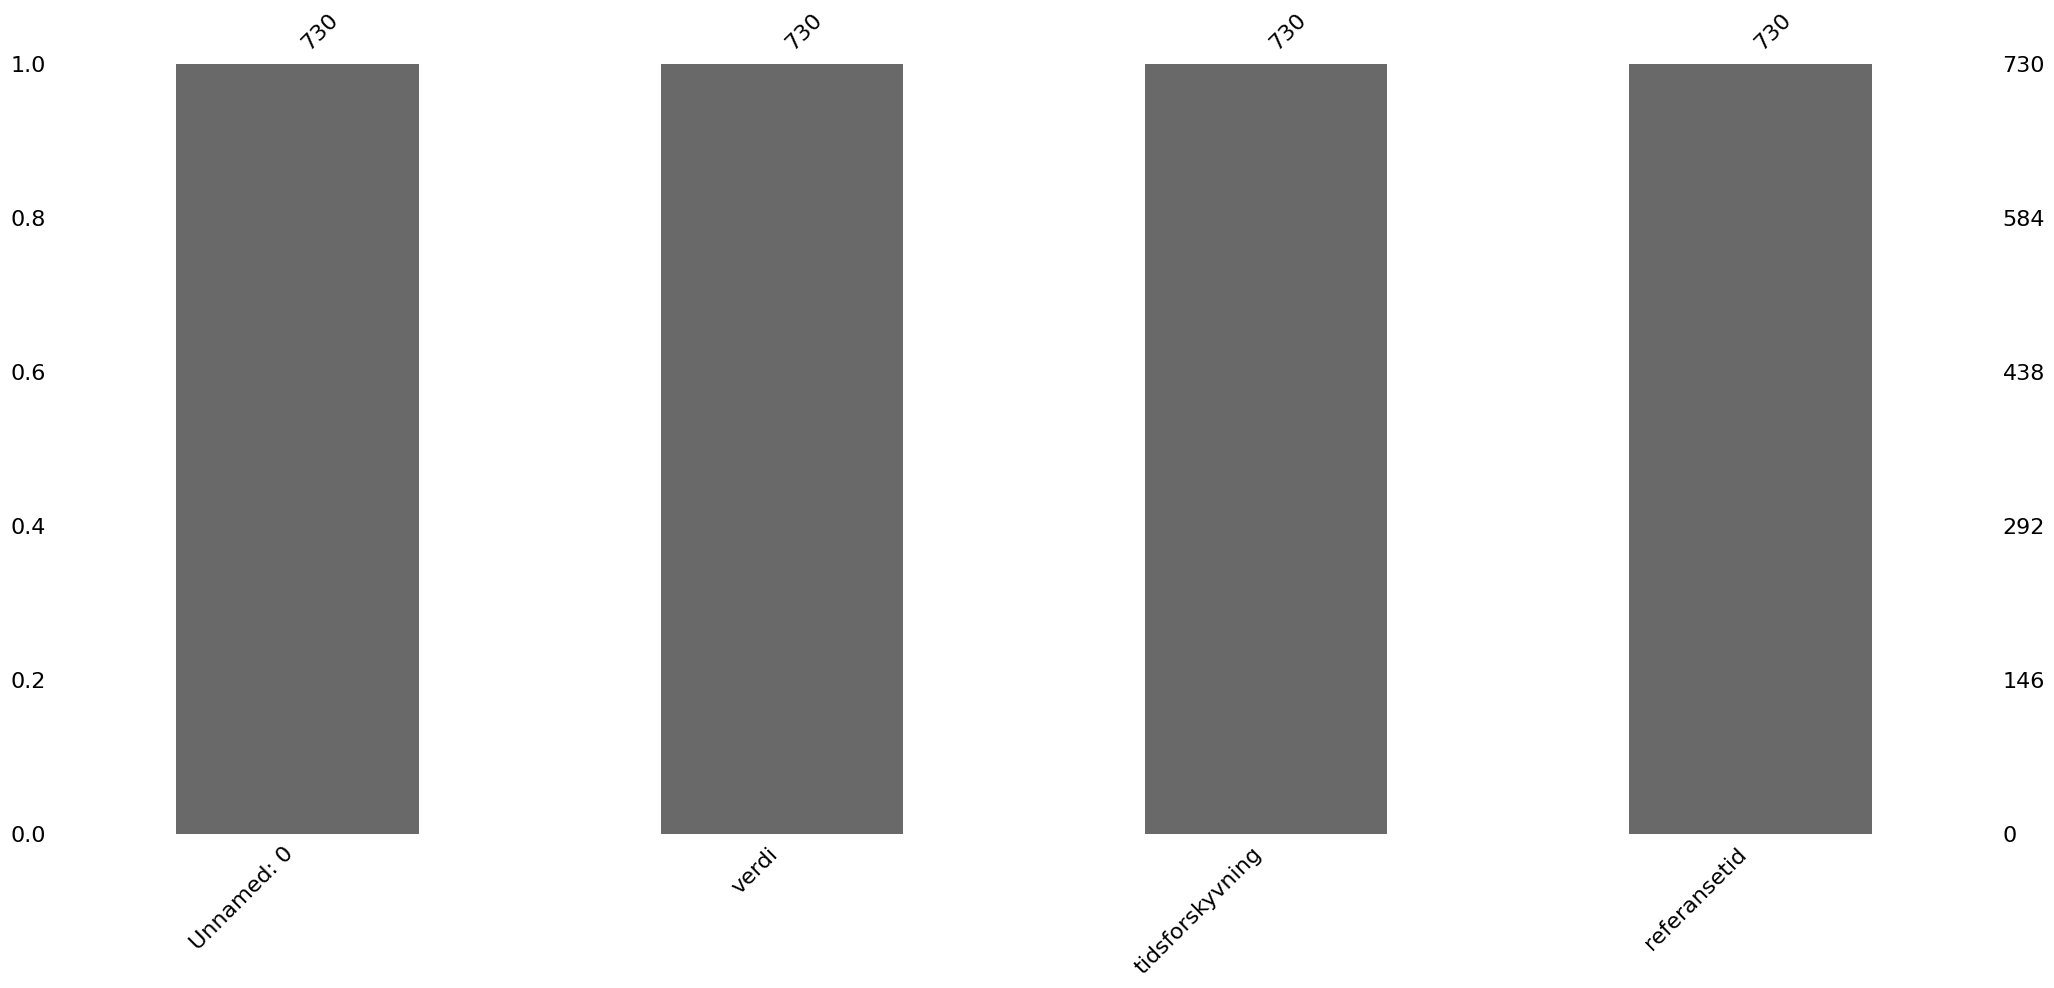

In [8]:
# se om det mangler noen tall i dataen
fc.missing_numbers(wind)

I dette datasettet er det ingen verdier som mangler. 

In [9]:
# Gjøre referansetid om til DateTime
wind['referansetid'] = pd.to_datetime(wind['referansetid'])

# Dataanalyse
Denne analysen skal gi grunnlaget for videre visualisering og predektiv analyse.
#### Median

In [10]:
# Medianen av datasettet
wind_median = fc.median(wind)

Medianen er 2.7


#### Gjennomsnitt

In [11]:
# Gjennomsnitt årlig av datasettet
avg_year = fc.average_year(wind)

Gjennomsnittlig verdi for datasettet er 3.04


In [12]:
# Gjennomsnitt månedlig av datasettet
avg_moth = fc.average_other(wind)
print(avg_moth)

måned
1     3.34
2     3.85
3     2.95
4     3.13
5     2.75
6     2.73
7     2.28
8     2.76
9     2.97
10    3.29
11    3.17
12    3.28
Name: verdi, dtype: float64


#### Standardavvik

In [13]:
# Standardavvik av datasettet
wind_std = fc.std(wind)

Standardavviket er 1.61


In [14]:
# Finner øvre og nedre grense med hjelp av standardavvik
fc.lower_upper_limit(wind)

Gjennomsnittlig verdi for datasettet er 3.04
Standardavviket er 1.61


(np.float64(-1.7828685660225219), np.float64(7.857389113967727))

# Visualisere data

I denne delen  skal gjøre dataen mere forståelig og tilgjenglig for et bredere publikum.

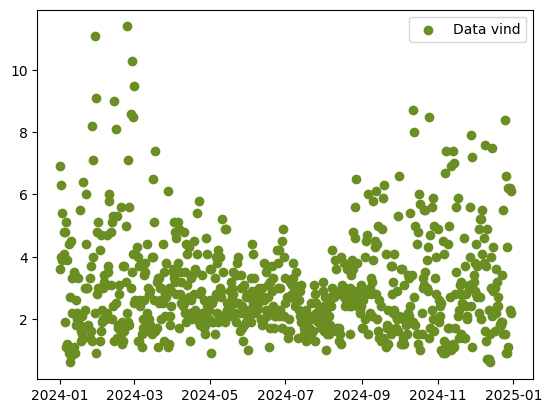

In [15]:
plt.scatter(wind['referansetid'], wind['verdi'], color = "olivedrab")
plt.legend(["Data vind"])

I denne grafen kan vi se at det er mest regn rundt frbruar og minst rundt juli, men dette kan visualiseres tydligere ved å definere månedende og finne gjennomsnittet. 

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des']

<BarContainer object of 12 artists>

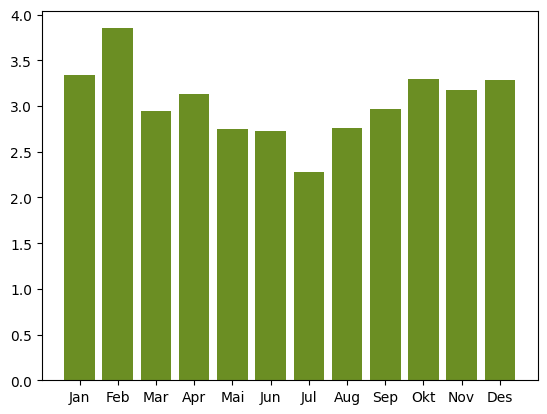

In [17]:
plt.bar(months, avg_moth, color = "olivedrab")

Ved å finne gjennomsnittet av hver måned kan vi med sikkerhet si at det er mest vind i februar og minst vind i juli. 

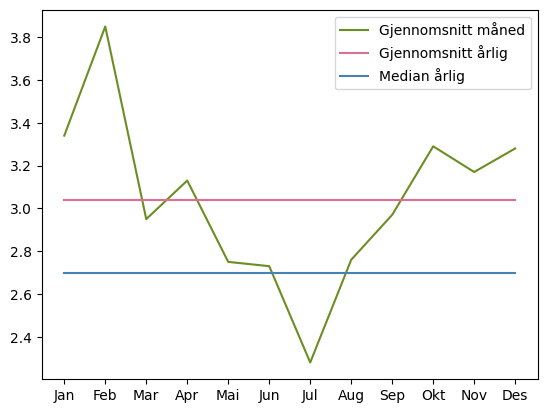

In [18]:
plt.plot(months, avg_moth, color = "olivedrab")
plt.plot(months, avg_year*np.ones(len(months)), color = "palevioletred")
plt.plot(months, wind_median*np.ones(len(months)), color = "steelblue")
plt.legend(['Gjennomsnitt måned','Gjennomsnitt årlig', 'Median årlig'])

I denne grafen er det også lagt inn årlig gjennomsitt og medianen av vind. Da kan vi se at det er i mars, april og september det blåser likest med gjennomsnittet årlig. Det er i juli og august det er likest med medianen. 

In [19]:
import plotly.express as px


fig = px.scatter(wind, x="referansetid", y="verdi")

# Prediktiv analyse
I denne delen skal vi ved hjelp fra scikit-learn forutse fremtidige miljøforhold basert på historisk data. 

In [20]:
fc.train_test_set(wind, 0.3)    


NameError: name 'fc' is not defined